##https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Data Set Information:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link] 

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes. 

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34]. 

This database is also available through the UW CS ftp server: 
ftp ftp.cs.wisc.edu 
cd math-prog/cpo-dataset/machine-learn/WDBC/

Attribute Information:

1) ID number 

2) Diagnosis (M = malignant, B = benign) 

3-32) 

Ten real-valued features are computed for each cell nucleus: 

a) radius (mean of distances from center to points on the perimeter) 

b) texture (standard deviation of gray-scale values) 

c) perimeter 

d) area 

e) smoothness (local variation in radius lengths) 

f) compactness (perimeter^2 / area - 1.0) 

g) concavity (severity of concave portions of the contour) 

h) concave points (number of concave portions of the contour) 

i) symmetry 

j) fractal dimension ("coastline approximation" - 1)





In [18]:

r_s = 101 

import numpy as np
import pandas as pd


df = pd.read_csv('G:/data/dataset/breast_cancer/data.csv')


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [19]:

df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [20]:
df['Unnamed: 32'].isnull().sum()

569

In [21]:

df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [22]:
df.drop('Unnamed: 32',axis=1,inplace = True)
df.drop('id',axis=1,inplace = True)

In [23]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:

df.nunique()


diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

In [25]:
#Statistics
df.describe()

df.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)


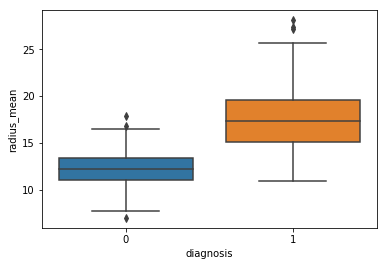

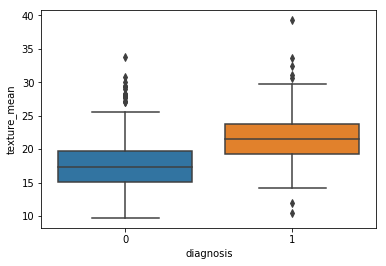

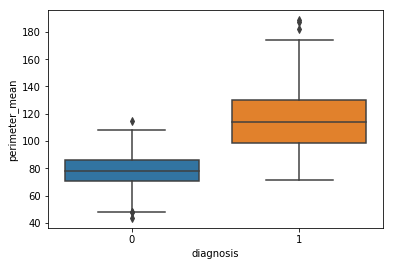

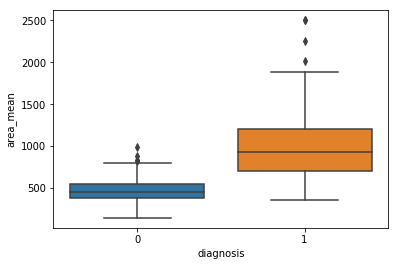

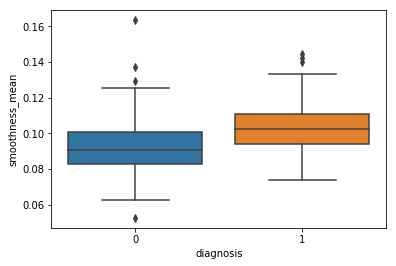

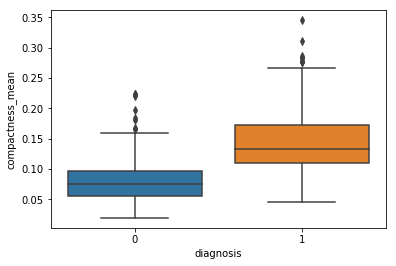

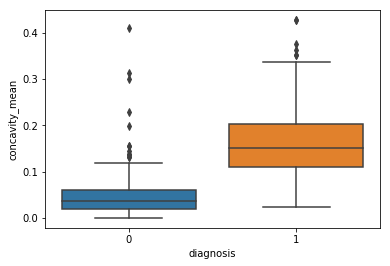

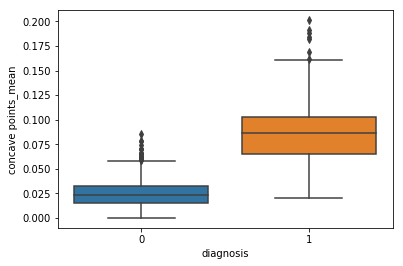

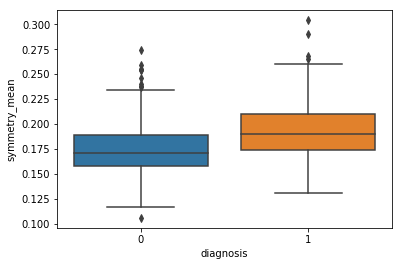

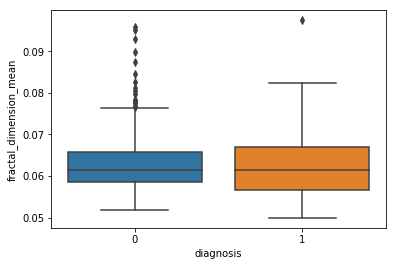

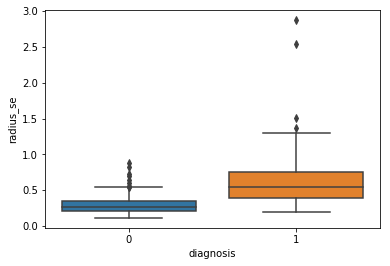

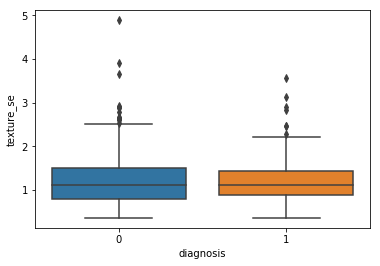

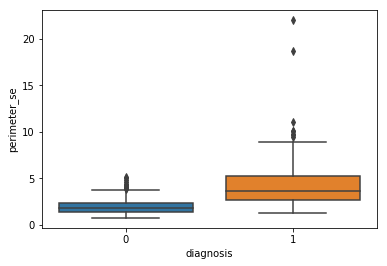

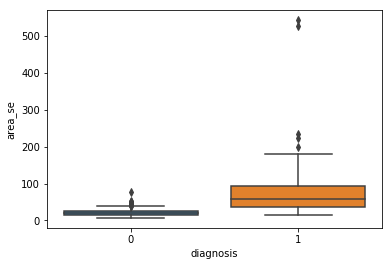

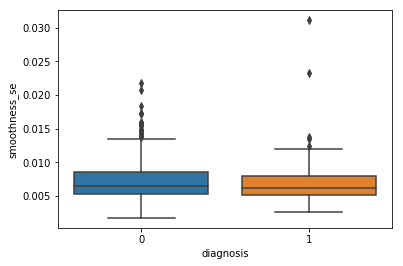

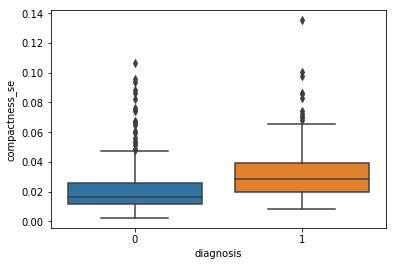

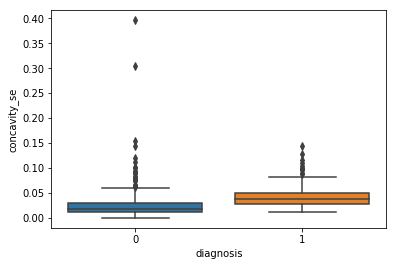

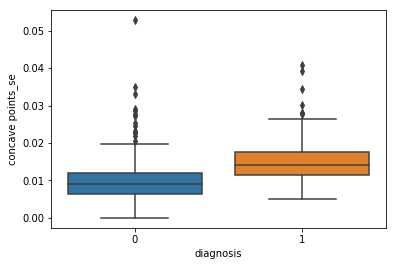

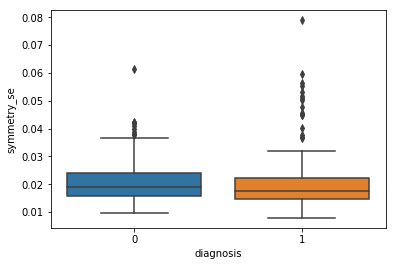

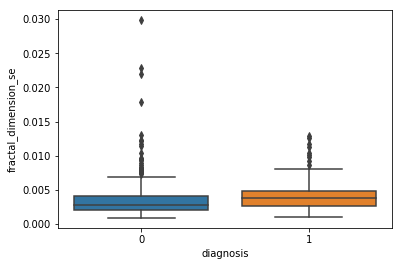

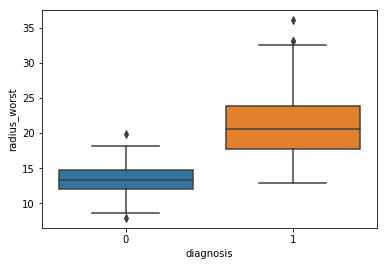

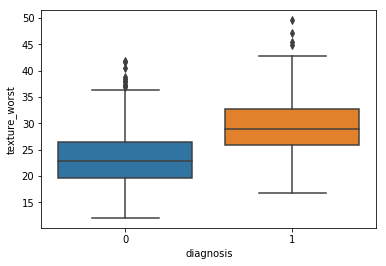

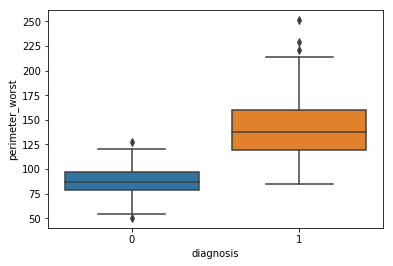

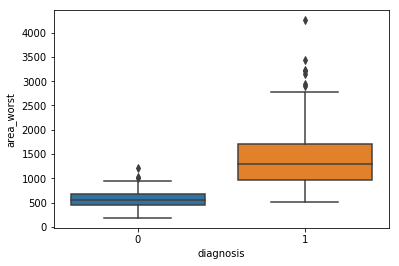

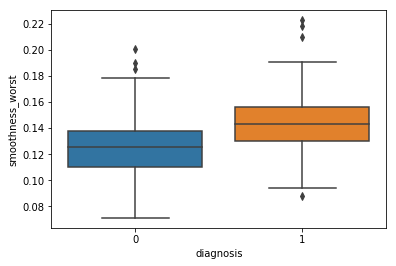

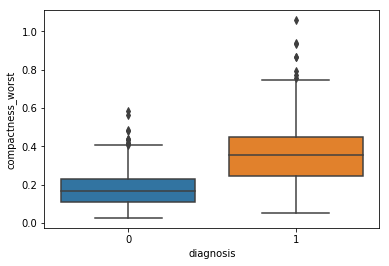

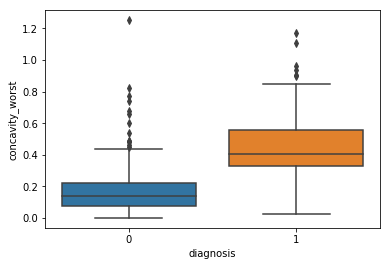

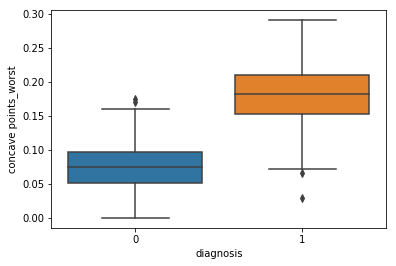

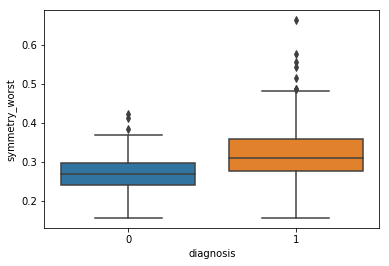

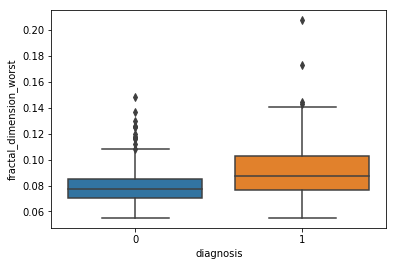

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
#box plot
for i in df.columns[1:]:
    sns.boxplot(x='diagnosis', y=i, hue=None, data=df, order=None,
                    hue_order=None, orient='v', color=None, palette=None, saturation=0.75,
                    width=0.8, dodge=True, fliersize=5, linewidth=None,
                    whis=1.5, notch=False, ax=None)
    plt.show()


In [29]:
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = r_s)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                             max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                             bootstrap=True, oob_score=False,
                             n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)

In [33]:
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

In [34]:
import itertools

from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,confusion_matrix


def plot_confusion_matrix(y_test,y_pred, classes=[0,1],
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = 'Blues') :
    cm = confusion_matrix(y_test,y_pred)
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

def evaluation_sklearn(y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    
    print('True_Positive:',cm[1][1])
    print('True_Negative:',cm[0][0])
    print('False_Positive:',cm[0][1])
    print('False_Negative:',cm[1][0])
    print('Accuracy :',accuracy_score(y_test,y_pred))
    print('ROC_AUC_score :',roc_auc_score(y_test,y_pred))
    print('Precision :',precision_score(y_test,y_pred))
    print('Recall :',recall_score(y_test,y_pred))
    print('F-statistic :',f1_score)
#

from sklearn.metrics import roc_curve,auc
def ROC_AUC_curve(x_test,y_test,model):
    roc, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5))
    probs = model.predict_proba(x_test)
    y_prob = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, y_prob)

    from sklearn import metrics
    roc_auc= auc(fpr, tpr)

    ax.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    ax.plot([0, 1], [0, 1],'r--')
    ax.set_title('Receiver Operating Characteristic ',fontsize=20,color ='lightblue')
    ax.set_ylabel('True Positive Rate',fontsize=15,color ='grey')
    ax.set_xlabel('False Positive Rate',fontsize=15,color ='grey')
    ax.legend(loc = 'lower right', prop={'size': 16})

    plt.subplots_adjust(wspace=1)

True_Positive: 39
True_Negative: 71
False_Positive: 1
False_Negative: 3
Accuracy : 0.9649122807017544
ROC_AUC_score : 0.9573412698412699
Precision : 0.975
Recall : 0.9285714285714286
F-statistic : <function f1_score at 0x0000028EEB8F7598>


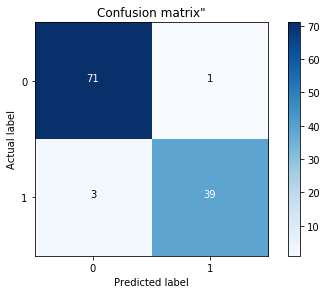

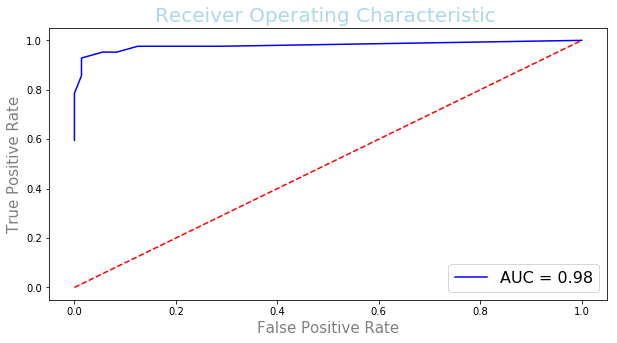

In [35]:
plot_confusion_matrix(y_test,y_pred)
evaluation_sklearn(y_test,y_pred)
ROC_AUC_curve(x_test,y_test,model=rfc)

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid ={'n_estimators':[10,50,100], 'criterion':['gini','entropy']}
rfc_cv = GridSearchCV(estimator = rfc, param_grid = param_grid ,
                      scoring = 'recall', 
                      n_jobs = -1)
rfc_cv.fit(x_train, y_train)

best_parameters = rfc_cv.best_params_
print('The best parameters for using this model is', best_parameters)

The best parameters for using this model is {'criterion': 'entropy', 'n_estimators': 50}


In [44]:
rfc = RandomForestClassifier(n_estimators=50,criterion = 'entropy')
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

True_Positive: 40
True_Negative: 71
False_Positive: 1
False_Negative: 2
Accuracy : 0.9736842105263158
ROC_AUC_score : 0.9692460317460317
Precision : 0.975609756097561
Recall : 0.9523809523809523
F-statistic : <function f1_score at 0x0000028EEB8F7598>


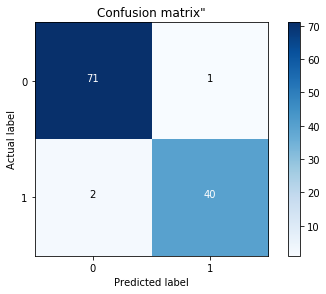

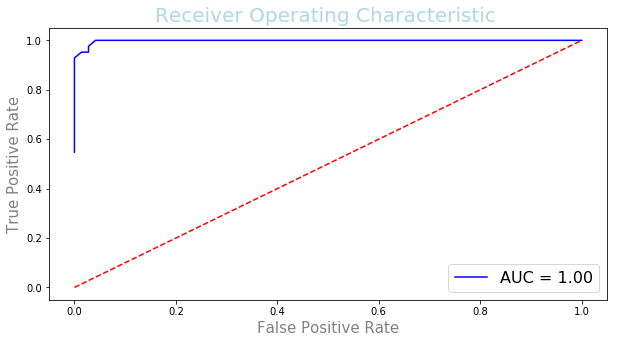

In [45]:
plot_confusion_matrix(y_test,y_pred)
evaluation_sklearn(y_test,y_pred)
ROC_AUC_curve(x_test,y_test,model=rfc)